In [1]:
!git clone https://github.com/Sonny-Inkai/DS201.git

Cloning into 'DS201'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 152 (delta 73), reused 143 (delta 64), pack-reused 0 (from 0)
Receiving objects: 100% (152/152), 2.61 MiB | 30.07 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [2]:
!ls

DS201


In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [5]:
%cd DS201/Convolutional-KANs/

/kaggle/working/DS201/Convolutional-KANs


In [6]:
!ls

architectures_28x28			 images
calculate_training_times_cifar10.py	 kan_convolutional
calculate_training_times_fashion.py	 KANConvs_MLP_2.py
calculate_training_times_mnist.py	 LICENSE
compute_flops.py			 models
Eval_FashionMNIST_torchlike.ipynb	 README.md
evaluations.py				 requirements.txt
generic_train.py			 results
grid_size_parameters.ipynb		 test_training.py
hiperparam_tuning.py			 train_cifar10.py
hiperparam_tuning_without_cv_fashion.py  train_mnist.py
hiperparam_tuning_without_cv.py


In [7]:
!python train_mnist.py

Failed to download (trying next):
HTTP Error 403: Forbidden

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 17894540.98it/s]
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden

100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 473986.16it/s]
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden

100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 4416320.33it/s]
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden

100%|█████████████████████████████████| 4542/4542 [00:00<00:00, 12541493.59it/s]
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
============== Training model KANC MLP (gs = 5) ============
Params start 7460
100%|████████████████████████████████████████

In [8]:
!python calculate_training_times_mnist.py

100%|█████████████████████████████████████████| 118/118 [01:04<00:00,  1.82it/s]
KANC MLP (gs = 5) took: 71.22088625099968
100%|█████████████████████████████████████████| 118/118 [01:05<00:00,  1.81it/s]
KKAN (gs = 5) took: 71.51231098300013
100%|█████████████████████████████████████████| 118/118 [00:11<00:00, 10.27it/s]
Conv & KAN (gs = 5) took: 13.257791059999818
100%|█████████████████████████████████████████| 118/118 [00:10<00:00, 11.10it/s]
CNN took: 12.525123322000127


### Trực quan

In [10]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from architectures_28x28.KKAN import *
from architectures_28x28.CKAN_BN import CKAN_BN
from architectures_28x28.KANConvs_MLP import *
from architectures_28x28.KANConvs_MLP_2 import *
from architectures_28x28.SimpleModels import *
from architectures_28x28.conv_and_kan import *

from evaluations import *
from generic_train import train_model_generic

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Transformaciones
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Cargar MNIST y filtrar por dos clases
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)

mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader
train_loader = DataLoader(mnist_train, batch_size=1024, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=1024, shuffle=False)

In [12]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
path = "/kaggle/working/DS201/Convolutional-KANs/models/MNIST"
path_res = "/kaggle/working/DS201/Convolutional-KANs/results/MNIST"

In [13]:
import os
if not os.path.exists(path_res):
    os.mkdir(path_res)

In [14]:
def join_path(name,pa):
  print(os.path.join(pa,name+".pt"))
  return os.path.join(pa,name+".pt")
models_listed = os.listdir(path)
import json

models = []

for m in models_listed:
    # Open and read the JSON file
    model = torch.load(os.path.join(path,m), map_location=torch.device(device))
    models.append(model)
    print(model.name)

Conv & KAN (gs = 5)
CNN
KKAN (gs = 5)
KANC MLP (gs = 5)


<ipython-input-14-7f74fb35a523>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(os.path.join(path,m), map_location=torch.device(device))


In [15]:
criterion = nn.CrossEntropyLoss()

In [16]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]


def final_plots(models, test_loader, criterion, device, use_time=False):
    accs = []
    precisions = []
    recalls = []
    f1s = []
    params_counts = []
    times = []
    tflops_per_sec = []
    contar = 0

    # Define color map and dictionary to store colors for models with "10" and "20" variants
    color_map = plt.get_cmap('tab20')(np.linspace(0, 1, len(models)))
    color_dict = {}
    fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size

    if use_time:
        with open(os.path.join(path_res, "epoch_times.json"), 'r') as file:
            times_dict = json.load(file)

    models_used = []
    models.sort(key=lambda x: x.name, reverse=False)

    for i, model in enumerate(models):

        # Test model and collect metrics
        test_loss, accuracy, precision, recall, f1 = test(model, device, test_loader, criterion)
        accs.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        params_counts.append(count_parameters(model))

        if use_time:
            times.append(times_dict.get(model.name, np.nan))
        else:
            times.append(np.nan)

        # Check for "10" or "20" in model names
        base_name = model.name.replace("10", "").replace("20", "")
        if base_name not in color_dict:
            color_dict[base_name] = color_map[i]  # Assign new color to this base model name

        # Select marker based on model name
        marker = 'x' if '10' in model.name else 'o' if '20' in model.name else 's'
        ax.scatter(count_parameters(model), accuracy*100, label=model.name, color=color_dict[base_name], marker=marker,s=65)

        models_used.append(model)
        contar += 1

    # Plot setup
    #ax.set_title("Number of Parameters vs Accuracy", fontsize=16)
    ax.set_xlabel("Number of Parameters", fontsize=12)
    ax.set_ylabel("Accuracy (%)", fontsize=12)
    legend = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fontsize=9, ncol=3)  # Set smaller font size and 3 columns
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Create DataFrame and export results
    df = pd.DataFrame({
        "Test Accuracy": accs,
        "Test Precision": precisions,
        "Test Recall": recalls,
        "Test F1 Score": f1s,
        "Number of Parameters": params_counts,
        "Seconds/epoch": times,
    }, index=[m.name for m in models_used])


    return df

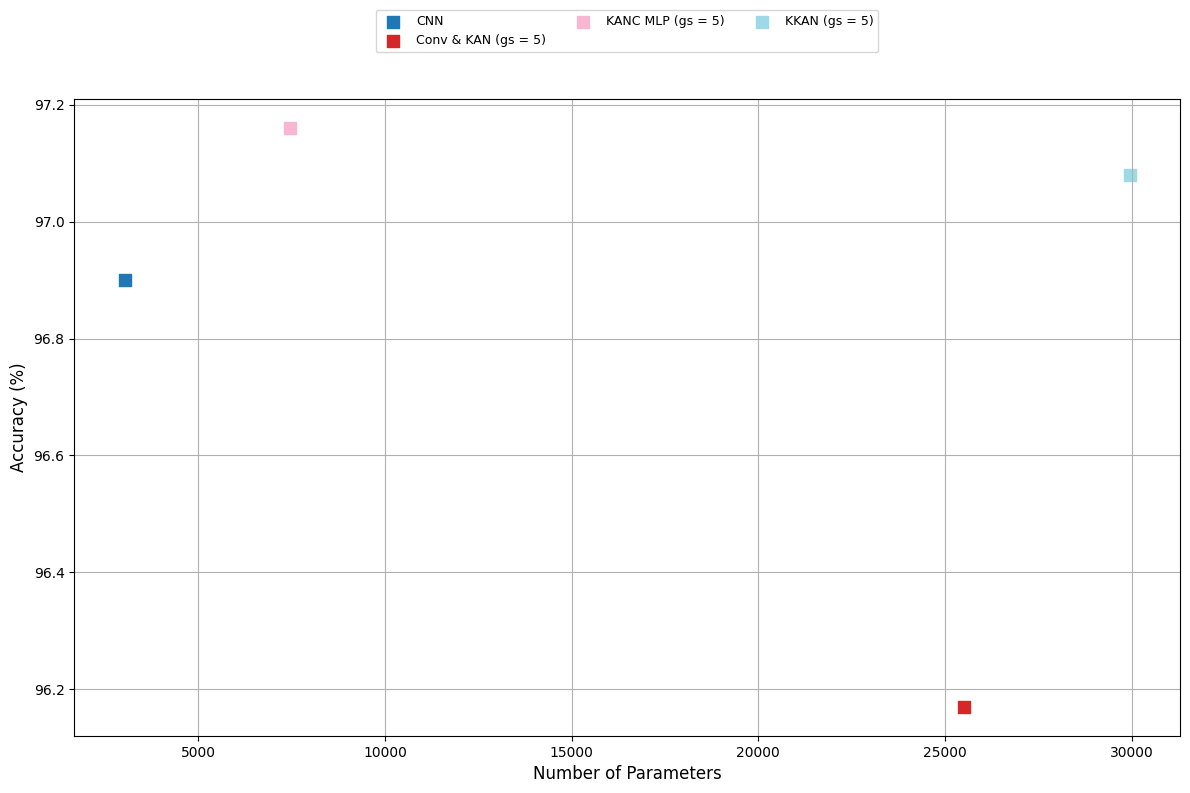

In [17]:
tabla = final_plots(models,test_loader,criterion,device,use_time = True)

In [18]:
tabla

,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Number of Parameters,Seconds/epoch
CNN,0.9690,0.968920,0.968986,0.968927,3020,12.525123
Conv & KAN (gs = 5),0.9617,0.961582,0.961599,0.961568,25510,13.257791
KANC MLP (gs = 5),0.9716,0.971525,0.971426,0.971440,7460,71.220886
KKAN (gs = 5),0.9708,0.970866,0.970701,0.970759,29950,71.512311
